In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


/home/venkatesh/anaconda3/envs/venkatesh_pytorch_updated_110/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model_name='mobilenetv2'


if(model_name=='mobilenetv2'):
    from models.mobilenet import mobilenetv2
    model=mobilenetv2(num_classes=3)
if(model_name=='ResNet50'):
    from models.resnet import ResNet50
    model=ResNet50(num_classes=3, channels=3)    
if(model_name=='ShuffleNet2'):
    from models.ShuffleNet2 import ShuffleNet2
    model=ShuffleNet2(num_classes=3)    
if(model_name=='SqueezeNet'):
    from models.SqueezeNet import SqueezeNet
    model=SqueezeNet(num_classes=3).float().cuda()

    


In [3]:
print(model)

MobileNetV2(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
        (3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
       

In [4]:
model=model.to(device)

# making directory for saving models


In [5]:
from datetime import datetime
import time

import os
print ('*******************************************************')
start_time=time.time()
experiments_folder="saved_models/"
experiment_name=datetime.now().strftime("%b_%d_%I_%M_%P_")+"_model_"+model_name

directory=experiments_folder+"/"+experiment_name+"/"
print(directory)
print('Model will be saved to  :', directory)

try:
    os.makedirs(directory)
except:
    print('model already existed..........')


*******************************************************
saved_models//Jul_29_11_59_am__model_mobilenetv2/
Model will be saved to  : saved_models//Jul_29_11_59_am__model_mobilenetv2/


In [6]:
#from models.resnet import ResNet50
#model=ResNet50(num_classes=3, channels=3)
#model=model.to(device)

In [7]:
import pandas as pd
print('traing data')
data = pd.read_csv('./csv_files/data_train.csv')

print(data.head())
# Print the statastis of the given data
print("stastics of the given data:")
print(data['label'].value_counts())
print('#'*100)

print('validation data')

data = pd.read_csv('./csv_files/data_valid.csv')

print(data.head())
# Print the statastis of the given data
print("stastics of the given data:")
print(data['label'].value_counts())
print('#'*100)

print('test data')

data = pd.read_csv('./csv_files/data_test.csv')

print(data.head())
# Print the statastis of the given data
print("stastics of the given data:")
print(data['label'].value_counts())
print('#'*100)


traing data
   Unnamed: 0                                         image_path  \
0        5758  ./processed_data/pocus_videos_to_images/convex...   
1        4244  ./processed_data/pocus_videos_to_images/convex...   
2        9517  ./processed_data/pocus_videos_to_images/convex...   
3         415  ./processed_data/pocus_videos_to_images/linear...   
4       12024  ./processed_data/pocus_videos_to_images/convex...   

                 label  
0                COVID  
1              healthy  
2                COVID  
3              healthy  
4  bacterial pneumonia  
stastics of the given data:
COVID                  3919
healthy                3697
bacterial pneumonia    2733
viral pneumonia         131
Name: label, dtype: int64
####################################################################################################
validation data
   Unnamed: 0                                         image_path  \
0       11813  ./processed_data/pocus_videos_to_images/convex...   
1        9

# Data loader

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import numpy as np


# Custom Dataset class for classification
class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file, usecols=['image_path', 'label'])
        self.transform = transform

        # Mapping class names to integers
        self.class_to_int = {"COVID": 0, "healthy": 1, "bacterial pneumonia": 2,"viral pneumonia": 2}  



    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        image_path = self.data['image_path'][idx]
        label = self.class_to_int[self.data['label'][idx]]  # Convert class label to integer

        # Load image using PIL
        image = Image.open(image_path)

        # Convert PIL Image to NumPy array
        #image = np.array(image)
        #image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            image = self.transform(image)
        #print(image.shape,label)

        image=image[:3,:,:]

        #print(np.unique(image))
        return image, label

# Transform

In [9]:
import torchvision.transforms as transforms

# Define transformations for data augmentation or normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to required size
    transforms.ToTensor()
])

In [10]:
!pip install tqdm

In [11]:

# Assuming you have a CSV file named 'data.csv' with image paths and class labels
train_csv_file = './drive/MyDrive/Aster/Aster_AI_Course/TA_Projects_Session_2_LUNG_USG_Classification/csv_files/data_train.csv'

# Create CustomDataset instance
dataset = CustomDataset('./csv_files/data_train.csv', transform=transform)
train_loader = DataLoader(dataset, batch_size=8, shuffle=False)

val_dataset = CustomDataset('./csv_files/data_valid.csv', transform=transform)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

test_dataset = CustomDataset('./csv_files/data_test.csv', transform=transform)
test_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

print(len(test_dataloader))
print(len(train_loader))
print(len(val_dataloader))
print(len(test_dataloader))






164
1310
164
164


In [12]:
num_classes = 3  # Assuming 3 classes: "covid", "normal", "pneumonia"


learning_rate=0.0001
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
# Train your model
from tqdm import tqdm

# Define your training function
model.train()
train_losses = []  # List to store training losses
val_losses = []  # List to store validaion losses

num_epochs=25



for epoch in range(num_epochs):
    running_loss = 0.0
    validation_loss=0.0
    
    y_true_train = []
    y_pred_train = []


    # Create tqdm progress bar
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch + 1}/{num_epochs}')

    for batch_idx, (images, labels) in progress_bar:
        images = images.to(device)
        labels = labels.to(device)
        #images=images/255
        #print(torch.unique(images))
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        y_pred_train.extend(outputs.detach().argmax(dim=-1).tolist())
        y_true_train.extend(labels.detach().tolist())

        
        # Update progress bar description with current loss
        progress_bar.set_postfix({'Loss': running_loss / (batch_idx + 1)})

        
    total_correct = len([True for x, y in zip(y_pred_train, y_true_train) if x==y])
    total = len(y_pred_train)
    accuracy = total_correct * 100 / total
    print("-------------------------------------------------")
    print("Epoch: {} Train mean loss: {:.8f}".format(epoch, running_loss))
    print("Train Accuracy%: ", accuracy, "==", total_correct, "/", total)
    print("-------------------------------------------------")
        
    save_path=directory+'/mymodel_'+str(epoch)+'.pth'
    torch.save(model.state_dict(), save_path)
    print(f'Model saved at: {save_path}')

    # storing the train losses
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    progress_bar = tqdm(enumerate(val_dataloader), total=len(val_dataloader), desc=f'Epoch {epoch + 1}/{num_epochs}')

    y_true_val = []
    y_pred_val = []

    
    model.eval()
    for batch_idx, (images, labels) in progress_bar:
        images = images.to(device)
        labels = labels.to(device)
        #images=images/255
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        validation_loss += loss.item()

        y_pred_val.extend(outputs.detach().argmax(dim=-1).tolist())
        y_true_val.extend(labels.detach().tolist())

        
        
        # Update progress bar description with current loss
        progress_bar.set_postfix({'Validation Loss': validation_loss / (batch_idx + 1)})

    # storing the validation losses

    epoch_loss = validation_loss / len(val_dataloader)
    val_losses.append(epoch_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    
    total_correct = len([True for x, y in zip(y_pred_val, y_true_val) if x==y])
    total = len(y_true_val)
    accuracy = total_correct * 100 / total

    print("-------------------------------------------------")
    print("Epoch: {} Val mean loss: {:.8f}".format(epoch, validation_loss))
    print("valiation Accuracy%: ", accuracy, "==", total_correct, "/", total)
    print("-------------------------------------------------")


Epoch 1/25: 100%|██████████| 1310/1310 [01:28<00:00, 14.82it/s, Loss=0.376]


-------------------------------------------------
Epoch: 0 Train mean loss: 492.27969976
Train Accuracy%:  84.74236641221374 == 8881 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_0.pth
Epoch [1/25], Loss: 0.3758


Epoch 1/25: 100%|██████████| 164/164 [00:08<00:00, 20.18it/s, Validation Loss=0.0945]


Epoch [1/25], Loss: 0.0945
-------------------------------------------------
Epoch: 0 Val mean loss: 15.49989851
valiation Accuracy%:  97.32824427480917 == 1275 / 1310
-------------------------------------------------


Epoch 2/25: 100%|██████████| 1310/1310 [01:25<00:00, 15.29it/s, Loss=0.113]


-------------------------------------------------
Epoch: 1 Train mean loss: 147.87784874
Train Accuracy%:  95.99236641221374 == 10060 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_1.pth
Epoch [2/25], Loss: 0.1129


Epoch 2/25: 100%|██████████| 164/164 [00:08<00:00, 19.95it/s, Validation Loss=0.0411]


Epoch [2/25], Loss: 0.0411
-------------------------------------------------
Epoch: 1 Val mean loss: 6.74803541
valiation Accuracy%:  98.93129770992367 == 1296 / 1310
-------------------------------------------------


Epoch 3/25: 100%|██████████| 1310/1310 [01:25<00:00, 15.29it/s, Loss=0.0333]


-------------------------------------------------
Epoch: 2 Train mean loss: 43.58142330
Train Accuracy%:  99.01717557251908 == 10377 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_2.pth
Epoch [3/25], Loss: 0.0333


Epoch 3/25: 100%|██████████| 164/164 [00:08<00:00, 20.22it/s, Validation Loss=0.0416]


Epoch [3/25], Loss: 0.0416
-------------------------------------------------
Epoch: 2 Val mean loss: 6.82818585
valiation Accuracy%:  98.85496183206106 == 1295 / 1310
-------------------------------------------------


Epoch 4/25: 100%|██████████| 1310/1310 [01:25<00:00, 15.38it/s, Loss=0.0216]


-------------------------------------------------
Epoch: 3 Train mean loss: 28.34899383
Train Accuracy%:  99.26526717557252 == 10403 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_3.pth
Epoch [4/25], Loss: 0.0216


Epoch 4/25: 100%|██████████| 164/164 [00:07<00:00, 20.56it/s, Validation Loss=0.0342]


Epoch [4/25], Loss: 0.0342
-------------------------------------------------
Epoch: 3 Val mean loss: 5.60967046
valiation Accuracy%:  98.93129770992367 == 1296 / 1310
-------------------------------------------------


Epoch 5/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.12it/s, Loss=0.0279]


-------------------------------------------------
Epoch: 4 Train mean loss: 36.60251906
Train Accuracy%:  98.97900763358778 == 10373 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_4.pth
Epoch [5/25], Loss: 0.0279


Epoch 5/25: 100%|██████████| 164/164 [00:08<00:00, 20.25it/s, Validation Loss=0.0106] 


Epoch [5/25], Loss: 0.0106
-------------------------------------------------
Epoch: 4 Val mean loss: 1.74270600
valiation Accuracy%:  99.77099236641222 == 1307 / 1310
-------------------------------------------------


Epoch 6/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.13it/s, Loss=0.0176] 


-------------------------------------------------
Epoch: 5 Train mean loss: 23.02955899
Train Accuracy%:  99.4942748091603 == 10427 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_5.pth
Epoch [6/25], Loss: 0.0176


Epoch 6/25: 100%|██████████| 164/164 [00:08<00:00, 20.27it/s, Validation Loss=0.0256]


Epoch [6/25], Loss: 0.0256
-------------------------------------------------
Epoch: 5 Val mean loss: 4.20008027
valiation Accuracy%:  99.16030534351145 == 1299 / 1310
-------------------------------------------------


Epoch 7/25: 100%|██████████| 1310/1310 [01:25<00:00, 15.25it/s, Loss=0.0162]


-------------------------------------------------
Epoch: 6 Train mean loss: 21.20767347
Train Accuracy%:  99.44656488549619 == 10422 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_6.pth
Epoch [7/25], Loss: 0.0162


Epoch 7/25: 100%|██████████| 164/164 [00:07<00:00, 20.70it/s, Validation Loss=0.024]  


Epoch [7/25], Loss: 0.0240
-------------------------------------------------
Epoch: 6 Val mean loss: 3.94199465
valiation Accuracy%:  99.46564885496183 == 1303 / 1310
-------------------------------------------------


Epoch 8/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.10it/s, Loss=0.0224] 


-------------------------------------------------
Epoch: 7 Train mean loss: 29.29307407
Train Accuracy%:  99.44656488549619 == 10422 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_7.pth
Epoch [8/25], Loss: 0.0224


Epoch 8/25: 100%|██████████| 164/164 [00:08<00:00, 20.13it/s, Validation Loss=0.0162]


Epoch [8/25], Loss: 0.0162
-------------------------------------------------
Epoch: 7 Val mean loss: 2.65164535
valiation Accuracy%:  99.8473282442748 == 1308 / 1310
-------------------------------------------------


Epoch 9/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.17it/s, Loss=0.0158]


-------------------------------------------------
Epoch: 8 Train mean loss: 20.74974204
Train Accuracy%:  99.54198473282443 == 10432 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_8.pth
Epoch [9/25], Loss: 0.0158


Epoch 9/25: 100%|██████████| 164/164 [00:08<00:00, 20.48it/s, Validation Loss=0.0107] 


Epoch [9/25], Loss: 0.0107
-------------------------------------------------
Epoch: 8 Val mean loss: 1.75438716
valiation Accuracy%:  99.8473282442748 == 1308 / 1310
-------------------------------------------------


Epoch 10/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.16it/s, Loss=0.00919]


-------------------------------------------------
Epoch: 9 Train mean loss: 12.03271723
Train Accuracy%:  99.62786259541984 == 10441 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_9.pth
Epoch [10/25], Loss: 0.0092


Epoch 10/25: 100%|██████████| 164/164 [00:08<00:00, 19.95it/s, Validation Loss=0.0388]


Epoch [10/25], Loss: 0.0388
-------------------------------------------------
Epoch: 9 Val mean loss: 6.36808512
valiation Accuracy%:  98.62595419847328 == 1292 / 1310
-------------------------------------------------


Epoch 11/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.23it/s, Loss=0.0164]


-------------------------------------------------
Epoch: 10 Train mean loss: 21.45789768
Train Accuracy%:  99.47519083969466 == 10425 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_10.pth
Epoch [11/25], Loss: 0.0164


Epoch 11/25: 100%|██████████| 164/164 [00:08<00:00, 20.32it/s, Validation Loss=0.0174]


Epoch [11/25], Loss: 0.0174
-------------------------------------------------
Epoch: 10 Val mean loss: 2.85345917
valiation Accuracy%:  99.69465648854961 == 1306 / 1310
-------------------------------------------------


Epoch 12/25: 100%|██████████| 1310/1310 [01:27<00:00, 15.02it/s, Loss=0.0042] 


-------------------------------------------------
Epoch: 11 Train mean loss: 5.50210282
Train Accuracy%:  99.8854961832061 == 10468 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_11.pth
Epoch [12/25], Loss: 0.0042


Epoch 12/25: 100%|██████████| 164/164 [00:08<00:00, 19.81it/s, Validation Loss=0.0104] 


Epoch [12/25], Loss: 0.0104
-------------------------------------------------
Epoch: 11 Val mean loss: 1.71128882
valiation Accuracy%:  99.77099236641222 == 1307 / 1310
-------------------------------------------------


Epoch 13/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.11it/s, Loss=0.0108] 


-------------------------------------------------
Epoch: 12 Train mean loss: 14.13128344
Train Accuracy%:  99.69465648854961 == 10448 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_12.pth
Epoch [13/25], Loss: 0.0108


Epoch 13/25: 100%|██████████| 164/164 [00:08<00:00, 20.08it/s, Validation Loss=0.111] 


Epoch [13/25], Loss: 0.1109
-------------------------------------------------
Epoch: 12 Val mean loss: 18.18634365
valiation Accuracy%:  97.25190839694656 == 1274 / 1310
-------------------------------------------------


Epoch 14/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.07it/s, Loss=0.0107] 


-------------------------------------------------
Epoch: 13 Train mean loss: 14.07916375
Train Accuracy%:  99.68511450381679 == 10447 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_13.pth
Epoch [14/25], Loss: 0.0107


Epoch 14/25: 100%|██████████| 164/164 [00:08<00:00, 20.20it/s, Validation Loss=0.0809]


Epoch [14/25], Loss: 0.0809
-------------------------------------------------
Epoch: 13 Val mean loss: 13.26789225
valiation Accuracy%:  98.09160305343511 == 1285 / 1310
-------------------------------------------------


Epoch 15/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.10it/s, Loss=0.00779]


-------------------------------------------------
Epoch: 14 Train mean loss: 10.20162434
Train Accuracy%:  99.78053435114504 == 10457 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_14.pth
Epoch [15/25], Loss: 0.0078


Epoch 15/25: 100%|██████████| 164/164 [00:08<00:00, 19.78it/s, Validation Loss=0.0134] 


Epoch [15/25], Loss: 0.0134
-------------------------------------------------
Epoch: 14 Val mean loss: 2.20502418
valiation Accuracy%:  99.8473282442748 == 1308 / 1310
-------------------------------------------------


Epoch 16/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.19it/s, Loss=0.0106] 


-------------------------------------------------
Epoch: 15 Train mean loss: 13.86873489
Train Accuracy%:  99.61832061068702 == 10440 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_15.pth
Epoch [16/25], Loss: 0.0106


Epoch 16/25: 100%|██████████| 164/164 [00:08<00:00, 19.98it/s, Validation Loss=0.0408]


Epoch [16/25], Loss: 0.0408
-------------------------------------------------
Epoch: 15 Val mean loss: 6.69876486
valiation Accuracy%:  99.16030534351145 == 1299 / 1310
-------------------------------------------------


Epoch 17/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.22it/s, Loss=0.00368]


-------------------------------------------------
Epoch: 16 Train mean loss: 4.82490032
Train Accuracy%:  99.8854961832061 == 10468 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_16.pth
Epoch [17/25], Loss: 0.0037


Epoch 17/25: 100%|██████████| 164/164 [00:08<00:00, 19.71it/s, Validation Loss=0.0119] 


Epoch [17/25], Loss: 0.0119
-------------------------------------------------
Epoch: 16 Val mean loss: 1.94894265
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


Epoch 18/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.09it/s, Loss=6.99e-5]


-------------------------------------------------
Epoch: 17 Train mean loss: 0.09159098
Train Accuracy%:  100.0 == 10480 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_17.pth
Epoch [18/25], Loss: 0.0001


Epoch 18/25: 100%|██████████| 164/164 [00:08<00:00, 20.23it/s, Validation Loss=0.00936]


Epoch [18/25], Loss: 0.0094
-------------------------------------------------
Epoch: 17 Val mean loss: 1.53511546
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


Epoch 19/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.10it/s, Loss=9.96e-6]


-------------------------------------------------
Epoch: 18 Train mean loss: 0.01304239
Train Accuracy%:  100.0 == 10480 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_18.pth
Epoch [19/25], Loss: 0.0000


Epoch 19/25: 100%|██████████| 164/164 [00:08<00:00, 20.49it/s, Validation Loss=0.01]  


Epoch [19/25], Loss: 0.0100
-------------------------------------------------
Epoch: 18 Val mean loss: 1.64789031
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


Epoch 20/25: 100%|██████████| 1310/1310 [01:27<00:00, 15.04it/s, Loss=5.02e-6]


-------------------------------------------------
Epoch: 19 Train mean loss: 0.00658067
Train Accuracy%:  100.0 == 10480 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_19.pth
Epoch [20/25], Loss: 0.0000


Epoch 20/25: 100%|██████████| 164/164 [00:08<00:00, 20.14it/s, Validation Loss=0.0109]


Epoch [20/25], Loss: 0.0109
-------------------------------------------------
Epoch: 19 Val mean loss: 1.78046816
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


Epoch 21/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.13it/s, Loss=2.64e-6]


-------------------------------------------------
Epoch: 20 Train mean loss: 0.00346094
Train Accuracy%:  100.0 == 10480 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_20.pth
Epoch [21/25], Loss: 0.0000


Epoch 21/25: 100%|██████████| 164/164 [00:08<00:00, 20.32it/s, Validation Loss=0.0117]


Epoch [21/25], Loss: 0.0117
-------------------------------------------------
Epoch: 20 Val mean loss: 1.92326098
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


Epoch 22/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.14it/s, Loss=1.35e-6]


-------------------------------------------------
Epoch: 21 Train mean loss: 0.00177252
Train Accuracy%:  100.0 == 10480 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_21.pth
Epoch [22/25], Loss: 0.0000


Epoch 22/25: 100%|██████████| 164/164 [00:07<00:00, 20.53it/s, Validation Loss=0.0126]


Epoch [22/25], Loss: 0.0126
-------------------------------------------------
Epoch: 21 Val mean loss: 2.06619366
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


Epoch 23/25: 100%|██████████| 1310/1310 [01:27<00:00, 15.02it/s, Loss=6.36e-7]


-------------------------------------------------
Epoch: 22 Train mean loss: 0.00083364
Train Accuracy%:  100.0 == 10480 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_22.pth
Epoch [23/25], Loss: 0.0000


Epoch 23/25: 100%|██████████| 164/164 [00:07<00:00, 20.50it/s, Validation Loss=0.0134]


Epoch [23/25], Loss: 0.0134
-------------------------------------------------
Epoch: 22 Val mean loss: 2.20001547
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


Epoch 24/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.06it/s, Loss=2.97e-7]


-------------------------------------------------
Epoch: 23 Train mean loss: 0.00038942
Train Accuracy%:  100.0 == 10480 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_23.pth
Epoch [24/25], Loss: 0.0000


Epoch 24/25: 100%|██████████| 164/164 [00:08<00:00, 19.37it/s, Validation Loss=0.0142]


Epoch [24/25], Loss: 0.0142
-------------------------------------------------
Epoch: 23 Val mean loss: 2.33659281
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


Epoch 25/25: 100%|██████████| 1310/1310 [01:26<00:00, 15.14it/s, Loss=1.47e-7]


-------------------------------------------------
Epoch: 24 Train mean loss: 0.00019193
Train Accuracy%:  100.0 == 10480 / 10480
-------------------------------------------------
Model saved at: saved_models//Jul_29_11_59_am__model_mobilenetv2//mymodel_24.pth
Epoch [25/25], Loss: 0.0000


Epoch 25/25: 100%|██████████| 164/164 [00:08<00:00, 20.24it/s, Validation Loss=0.015] 

Epoch [25/25], Loss: 0.0150
-------------------------------------------------
Epoch: 24 Val mean loss: 2.46259487
valiation Accuracy%:  99.92366412213741 == 1309 / 1310
-------------------------------------------------


# Training loss vs Validation loss curve

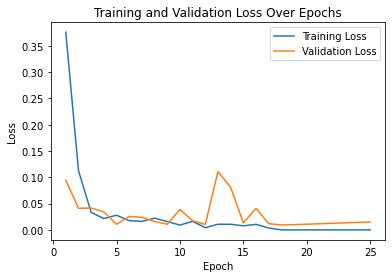

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation losses
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

# Model Analysis

In [15]:
from torchsummary import summary

summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [16]:
import re
from ptflops import get_model_complexity_info
from pthflops import count_ops

macs, params = get_model_complexity_info(model, (3, 448, 320), as_strings=True,print_per_layer_stat=False, verbose=False)
# # Extract the numerical value
flops = eval(re.findall(r'([\d.]+)', macs)[0])*2
# Extract the unit
flops_unit = re.findall(r'([A-Za-z]+)', macs)[0][0]

print('Computational complexity: {:<8}'.format(macs))
print('Computational complexity: {} {}Flops'.format(flops, flops_unit))
print('Number of parameters: {:<8}'.format(params))


Computational complexity: 911.67 MMac
Computational complexity: 1823.34 MFlops
Number of parameters: 2.23 M  


# Testing 

In [19]:
# choosing the best model from validation loss.

best_epoch=np.argmin(val_losses)
print('best_epoch:',best_epoch)

best_epoch: 17


In [21]:
ckpt = torch.load(directory+'/mymodel_'+str(best_epoch)+'.pth')
model.load_state_dict(ckpt)
model.eval()


MobileNetV2(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
        (3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
       

In [22]:
from tqdm import tqdm

progress_bar = tqdm(enumerate(test_dataloader), total=len(test_dataloader), desc=f'testing')

y_true_val = []
y_pred_val = []


model.eval()
for batch_idx, (images, labels) in progress_bar:
    images = images.to(device)
    labels = labels.to(device)
    #images=images/255
    optimizer.zero_grad()

    outputs = model(images)

    y_pred_val.extend(outputs.detach().argmax(dim=-1).tolist())
    y_true_val.extend(labels.detach().tolist())



    # Update progress bar description with current loss



total_correct = len([True for x, y in zip(y_pred_val, y_true_val) if x==y])
total = len(y_true_val)
accuracy = total_correct * 100 / total

print("-------------------------------------------------")
print("TEST Accuracy (%): ", accuracy, "==", total_correct, "/", total)
print("-------------------------------------------------")


testing: 100%|██████████| 164/164 [00:07<00:00, 21.17it/s]

-------------------------------------------------
TEST Accuracy (%):  99.92366412213741 == 1309 / 1310
-------------------------------------------------


[2, 0, 0, 1, 0, 0, 0, 1]


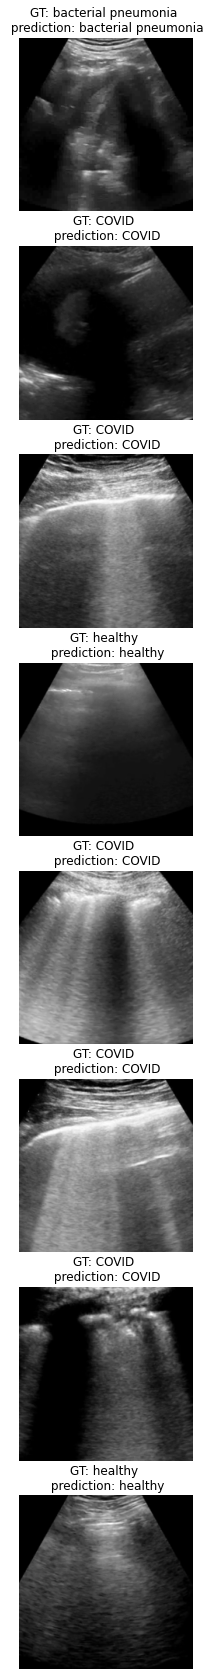

In [54]:
import matplotlib.pyplot as plt

int_to_class = {0:"COVID" , 1:"healthy", 2:"bacterial pneumonia" ,3:"viral pneumonia"}  

# Function to show images
def show_images(images, labels,predictions):
    plt.figure(figsize=(30, 30))
    for i in range(len(images)):
        plt.subplot(len(images),1 , i + 1)
        plt.title(f"GT: {int_to_class[labels[i].item()]} \n prediction: {int_to_class[predictions[i]]}")
        plt.imshow(images[i][0], cmap="gray")
        plt.axis('off')
    plt.show()

# Display a batch of images
for images, labels in test_dataloader:
    images = images.to(device)
    outputs = model(images)
    outputs_cpu=outputs.detach().argmax(dim=-1).tolist()
    print(outputs_cpu)
    
    break  # Show only the first batch
    
    
images=images.to('cpu')
    
show_images(images,labels,outputs_cpu)